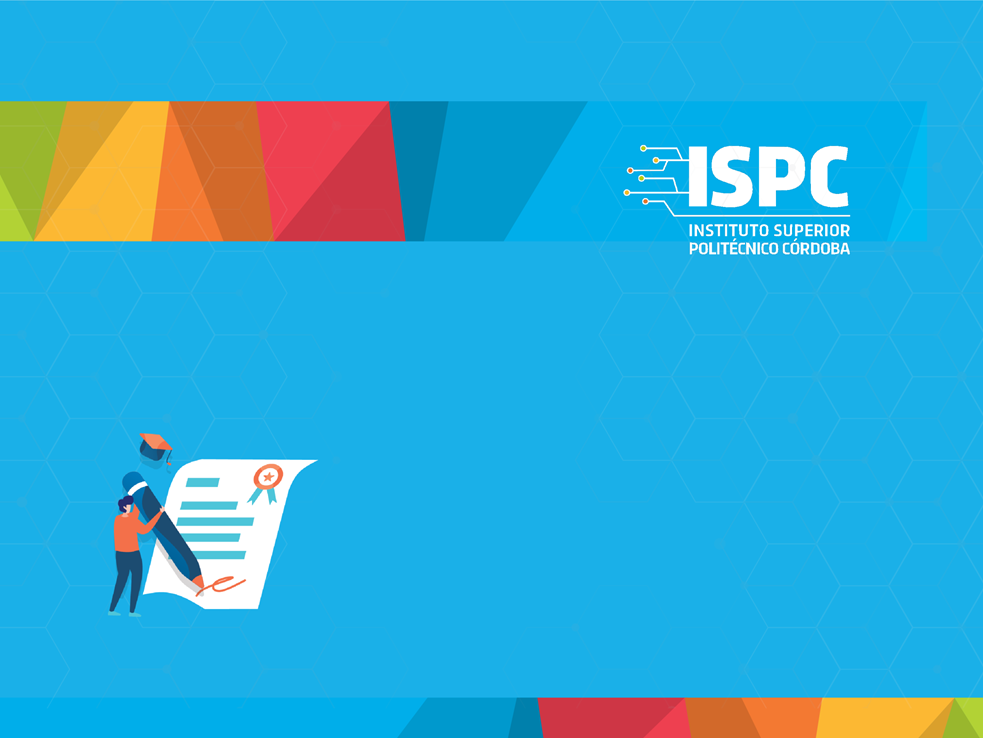

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sklearn as sk
import os as os
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import mpl_toolkits.mplot3d  # noqa: F401
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'



# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# =============================================================================
iris = load_iris(return_X_y = False, as_frame = True )

iris.data.head(3)

#PONER CODIGO AQUI

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = iris.data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
11,petal length (cm),petal width (cm),0.962865,0.962865
14,petal width (cm),petal length (cm),0.962865,0.962865
2,sepal length (cm),petal length (cm),0.871754,0.871754
8,petal length (cm),sepal length (cm),0.871754,0.871754
3,sepal length (cm),petal width (cm),0.817941,0.817941
12,petal width (cm),sepal length (cm),0.817941,0.817941
6,sepal width (cm),petal length (cm),-0.428440,0.428440
9,petal length (cm),sepal width (cm),-0.428440,0.428440
7,sepal width (cm),petal width (cm),-0.366126,0.366126
13,petal width (cm),sepal width (cm),-0.366126,0.366126


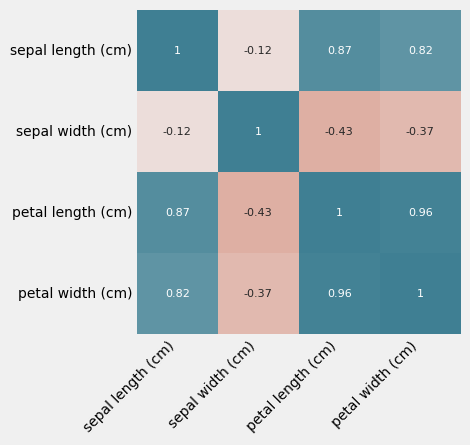

In [4]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

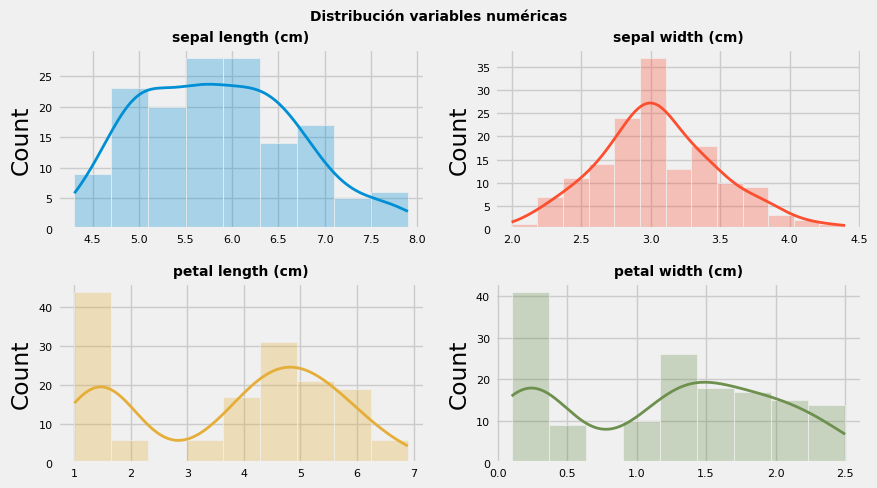

In [5]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = iris.data.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = iris.data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Los gráficos muestran en primer lugar lo que produciría un algoritmo de K-means usando tres grupos. 
Luego se muestra cuál es el efecto de una mala inicialización en el proceso de clasificación: al establecer n_init en solo 1 (el valor predeterminado es 10), se reduce la cantidad de veces que el algoritmo se ejecutará con diferentes semillas de centroide. 
La siguiente gráfica muestra lo que se obtendría usando ocho grupos y, finalmente, la verdad básica.

Se debe cargar nuevamente la base Iris, ya que este ejemplo usa un formato de diccionario

In [6]:
# División de los datos en train y test
# ==============================================================================

X = iris.data['petal length (cm)']
y = iris.data['petal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# Creación del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1469.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.92e-68
Time:                        20:58:30   Log-Likelihood:                 17.140
No. Observations:                 120   AIC:                            -30.28
Df Residuals:                     118   BIC:                            -24.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3718      0.045     -8.214      0.0

In [7]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-0.46146413, -0.28218757],
       [ 0.39908471,  0.44256491]])

In [8]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.890649,0.020904,0.849253,0.932044,0.469713,1.311584
1,1.648133,0.022607,1.603365,1.692902,1.226853,2.069414
2,0.175246,0.032925,0.110045,0.240448,-0.248693,0.599185
3,1.774381,0.024482,1.725899,1.822862,1.352689,2.196072


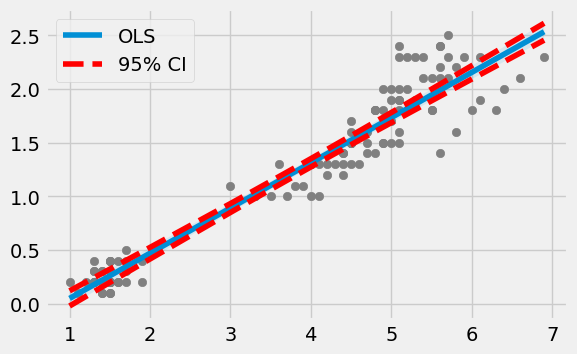

In [12]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "grey")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [10]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.18777965098392063
